This paper is studying the validity of the "conservation niche hypothesis" which is that enviornment/evolutionary niches are stable over time. In this study, they synthesize the results of a bunch of papers, each paper examining an invasive species and comparing its invasive niche with its native niche to test for similarity. The main purpose of this paper is to show that niche conservation varies between species, which shows that the niche conservatism hypothesis does not hold as a general "law".



In [82]:
#must !pip install openpyxl
import seaborn as sns
import pandas as pd
previous_col = ''
i = 0
df = pd.read_excel("PNAS_Liu_DatasetS1.xlsx")


#the major problem is that there are 2 headers: headers and subheaders in the excel file.
#In the dataframe, the columns are the headers and the first row contains subheadings. 
#I need to merge these headings so that they are just column names containing both headers
# to do this, I iterate through all the columns, and the columns with subheaders have 
#"unnamed" column names. So I detect this with a for loop, and the most recent header is 
# merged with the subheader and stored in the first row.
#the column names are then set to the first row, and first row deleted.
#but the first row with the header name is not "unnamed" and so it is lost in this operation
#so I just brute forced the cases not covered by my
#code by rewriting columns with the "except_dict" dictionary
# there is likly a more elegant solution that involves overwriting the unnamed columns 
#with the header before the 2 are merged, but this works.

except_dict = { 
            'Assessment of niche overlap':'Assessment of niche overlap: Technique',
            'Niche equivalence test':'Niche equivalence test: Technique',
            'Niche similarity test':'Niche similarity test: Technique',        
            'Niche dynamics estimated by the COUE scheme':'Niche dynamics estimated by the COUE scheme: Non-analogous environments',
            'Transformed dynamic values':'Transformed dynamic values: PropE', 
}
df.rename(columns = except_dict, inplace = True)

for col in df.columns:
    
    #because the proper header is in the col directly before the cols with the subheader,
    # this is the major head and connected with the subhead down below
    
    if 'Unnamed' not in col:# the columns that contain a subheading have 'unnamed' as a col
        previous_col = col.strip(': Technique')# most recent non-unnamed header is stored
        previous_col = previous_col.strip(': Non-analogous environments')# these are to clean the brute force
        previous_col = previous_col.strip(': PropE')
        df.loc[0,col] = col
    else:
        df.loc[0,col] = previous_col+':'+df.loc[0,col]#major head and subhead in row 0


#now migrate the subheadings to the header and get rid of the first column
i = 0
#print(df.columns)

for col in df.columns:
    
    df.rename(columns = {col:df.loc[0,col]}, inplace = True)#writes subheader to header
df = df.iloc[1:,:]#this gets rid of subheader row
print(df.head(5))
#

                                           Author(s)    Year  \
1  Ancillotto, L., Strubbe, D., Menchetti, M. & M...  2016.0   
2  Ancillotto, L., Strubbe, D., Menchetti, M. & M...  2016.0   
3         Angetter, L.-S., Lotters, S., & Rodder, D.  2011.0   
4        Banerjee, A.K., Mukherjee, A. & Dewanji, A.  2017.0   
5        Banerjee, A.K., Mukherjee, A. & Dewanji, A.  2017.0   

                                               Title  \
1  An overlooked invader? Ecological niche, invas...   
2  An overlooked invader? Ecological niche, invas...   
3  Climate niche shift in invasive species: the c...   
4  Potential distribution of Mikania micrantha Ku...   
5  Potential distribution of Mikania micrantha Ku...   

                                     Journal              Species  \
1                       Biological Invasions  Psittacula eupatria   
2                       Biological Invasions  Psittacula eupatria   
3  Biological Journal of the Linnean Society        Anolis sagrei   
4 

C:\Users\S_AngelliNichols\AppData\Local\Temp\ipykernel_25860\3287031439.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Year' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[0,col] = col
C:\Users\S_AngelliNichols\AppData\Local\Temp\ipykernel_25860\3287031439.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Year of introduction' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[0,col] = col
C:\Users\S_AngelliNichols\AppData\Local\Temp\ipykernel_25860\3287031439.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '# Native occurrences' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[0,col]

In [81]:

print(df.shape)
#this df is 925 rows and is the # of papers (86) times the number of species menioned 
#in each paper. So because different papers mentions different numbers of species, the math
#isnt clean

Index(['Author(s)', 'Year', 'Title', 'Journal', 'Species', 'Taxonomic group',
       'Group of organism', 'Native continent(s)', 'Introduced continent(s)',
       'Year of introduction', 'Intentionality of introduction',
       '# Native occurrences', '# Introduced occurrences', '# Predictors',
       'Predictors', 'Resolution (Degree)', 'Additional paramter(s)',
       'Niche approach', 'Niche technique', 'Niche criterion',
       'Author's conclusion', 'Overall conclusion of the study',
       'Assessment of niche overlap: Technique',
       'Assessment of niche overla:Metric', 'Assessment of niche overla:Value',
       'Niche equivalence test: Technique', 'che equivalenc:Conclusion',
       'Niche similarity test: Technique',
       'che similarity:Conclusion (No direction)',
       'che similarity:Conclusion (Introduced to Native)',
       'che similarity:Conclusion \n(Native to Introduced)',
       'Niche dynamics estimated by the COUE scheme: Non-analogous environments',
       '

count      925.0
unique     204.0
top       1900.0
freq        20.0
Name: Year of introduction, dtype: float64

In [78]:
# I will focus on year of introduction and intentionality of introduction
#the describe function for taxonomic group will give me the count and the most frequent 
#and its frequency
#between all species. There are observations for for every record.
print(df['Taxonomic group'].describe())


#intentionality
#this will give a count of intentional or unintentional, and the most frequent of
#the boolian. There will be one for each observation (paperxspecies)
df['Intentionality of introduction'].describe()


count        925
unique        13
top       Plants
freq         471
Name: Taxonomic group, dtype: object


count             925
unique              3
top       Intentional
freq              493
Name: Intentionality of introduction, dtype: object

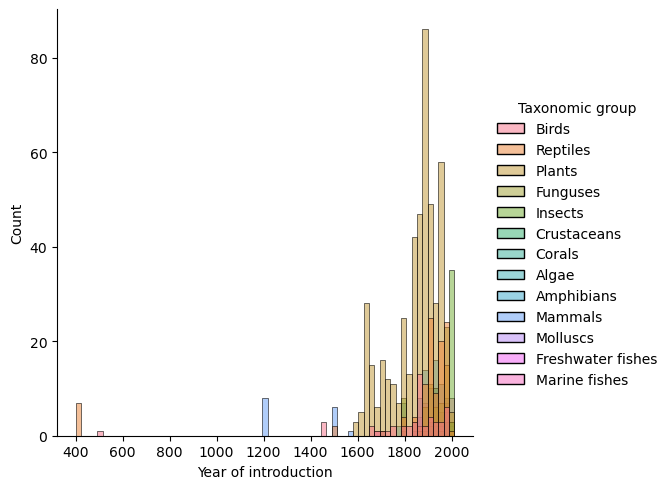

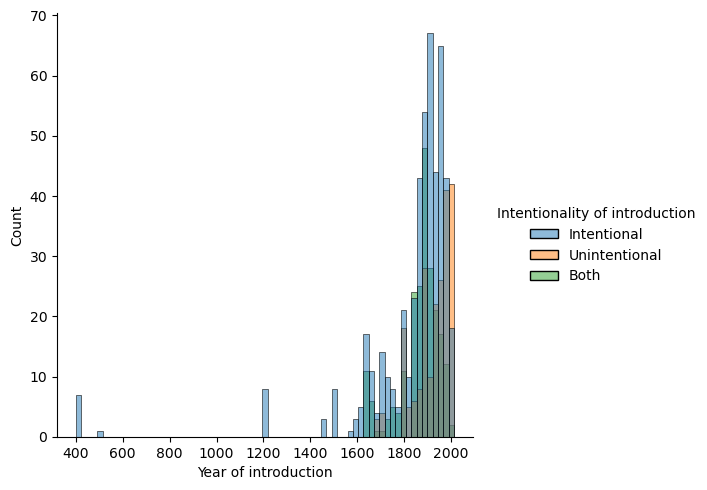

In [79]:
# I was interested in the relation between taxonomic group and year of introduction in
#their sample. The thought being, plants take longer to be introduced than more "mobile"
#organisms. To show this I wanted a histogram where I made the hues the taxonomic group
# of the species, and plotted the year of introduction on the x.
sns.displot(data=df, hue= 'Taxonomic group', x ='Year of introduction')
#with this visudalization you can clearly see the extreme over representation of plants
# This also shows that quite a bit of plants were introduced in the mid 1800s.
# but also it can be observed that there introduction occured with much higher frequency
#this is inline with the describe function in the previous part, where plants were the most
# common taxonomic group.
#this relates to a hypothesis of the paper because plants are very different from organismal
# conception of niches. More or less stable, this over representation shows a biasing
# role.

# I was also interested in if unintentional introductions occured earlier than intentional
#introductions. This plot shows a histogram of year of introduction with a hue of 
#intentionality of introduction
sns.displot(data = df, x = 'Year of introduction',hue = 'Intentionality of introduction')
# This plot shows that in the study population, most invasive organisms were intentionally
#introduced. This relates to the hypothesis of the authors as unintentional interactions
# have become more frequent as time has gone on. The distance between time of introduction
# and modern day niche difference plays a major role in thier analysis, and this trend
# could mean that all unintentional introductions they study have not had the chance to 
# diverge.